In [1]:
pwd

'/content'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# In this I'm attaching my google drive to the 
# It requires authentication from account
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
ls

gdrive/  sample_data/


In [5]:
cd /content/gdrive/MyDrive/face_recog/face-detection

/content/gdrive/MyDrive/face_recog/face-detection


In [6]:
%cd face-detection/

[Errno 2] No such file or directory: 'face-detection/'
/content/gdrive/MyDrive/face_recog/face-detection


In [7]:
# Importing all the required library and also facebox to verify the installation
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
import numpy as np
from PIL import Image, ImageDraw
import os
import cv2
import time
from face_detector import FaceDetector

Instructions for updating:
non-resource variables are not supported in the long term


In [10]:
cd ..

/content/gdrive/MyDrive/face_recog


In [9]:
pwd

'/content/gdrive/MyDrive/face_recog/face-detection'

In [11]:
## Providing path for pretrained model of facebox
MODEL_PATH = 'model.pb'
face_detector = FaceDetector(MODEL_PATH, gpu_memory_fraction=0.75, visible_device_list='0')
## Gpu memory can be adjusted by using gpu_memory_fraction parameters

In [13]:
pwd

'/content/gdrive/MyDrive/face_recog'

In [14]:
## Darawing boxes around the face present in the image
## Confidence score indicates how sure model is in recosgnising faces
def draw_boxes_on_image_t(image, boxes, scores):

    image_copy = image.copy()
    draw = ImageDraw.Draw(image_copy, 'RGBA')
    width, height = image.size
    print('Recieve boxes', boxes)
    print('Recive answer', scores)
    #print('Type of score', type(scores))
    for b, s in zip(boxes, scores):
        ymin, xmin, ymax, xmax = b
        #print('b', b[])
        fill = (255, 0, 0, 45)
        outline = 'red'
        draw.rectangle(
            [(xmin, ymin), (xmax, ymax)],
            fill=fill, outline=outline
        )
        #draw.text((xmin, ymin), text='{:.3f}'.format(s))
        
        txt = str(scores)
        #print('Type of txt', type(txt))
        draw.text((xmin, ymin), text=txt)
        
    return image_copy.resize(required_size)

In [15]:
## Darawing boxes around the face present in the image
## Confidence score indicates how sure model is in recosgnising faces
def draw_boxes_on_image_cv(image, boxes, scores):

    image_copy = image.copy()
    image_copy = np.array(image_copy)
    #image_copy = cv2.cvtColor(image_copy,cv2.COLOR_RGB2BGR)
    #image_copy = cv2.cvtColor(image_copy,cv2.COLOR_RGB2BGR)

    #draw = ImageDraw.Draw(image_copy, 'RGBA')
    width, height = image.size
    print('Recieve cv boxes', boxes)
    print('Recive cv answer', scores)
    #print('Type of score', type(scores))
    for b, s in zip(boxes, scores):
        ymin, xmin, ymax, xmax = b
        color = (255, 0, 0, 45)
        outline = 'red'
        thickness = 2
        cv2.rectangle(image_copy,(int(xmin), int(ymin)),(int(xmax), int(ymax)), color,thickness )
        fontFace = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        fontColor = (255,255,255)
        print('Recive cv answer in loop', scores)
        cv2.putText(image_copy, str(scores), (int(xmin), int(ymin)), fontFace,fontScale,fontColor)
        #image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
        #image_copy = cv2.cvtColor(image_copy,cv2.COLOR_RGB2BGR)
        
    cv2_imshow(image_copy)
        
        
    return image_copy.resize(required_size)

1 (256, 256, 3)
2 (256, 256, 3)
3 (256, 256, 3)
4 (256, 256, 3)
5 (256, 256, 3)
6 (256, 256, 3)
7 (256, 256, 3)
8 (256, 256, 3)
9 (256, 256, 3)
10 (256, 256, 3)
11 (256, 256, 3)
12 (256, 256, 3)
13 (256, 256, 3)
14 (256, 256, 3)
15 (256, 256, 3)
16 (256, 256, 3)
17 (256, 256, 3)
18 (256, 256, 3)
19 (256, 256, 3)
20 (256, 256, 3)
21 (256, 256, 3)
22 (256, 256, 3)
23 (256, 256, 3)
24 (256, 256, 3)
25 (256, 256, 3)
26 (256, 256, 3)
27 (256, 256, 3)
28 (256, 256, 3)
29 (256, 256, 3)
30 (256, 256, 3)
31 (256, 256, 3)
32 (256, 256, 3)
33 (256, 256, 3)
34 (256, 256, 3)
35 (256, 256, 3)
36 (256, 256, 3)
37 (256, 256, 3)
38 (256, 256, 3)
39 (256, 256, 3)
40 (256, 256, 3)
41 (256, 256, 3)
42 (256, 256, 3)
43 (256, 256, 3)
44 (256, 256, 3)
45 (256, 256, 3)
46 (256, 256, 3)
47 (256, 256, 3)
48 (256, 256, 3)
49 (256, 256, 3)
50 (256, 256, 3)
51 (256, 256, 3)
52 (256, 256, 3)
53 (256, 256, 3)
54 (256, 256, 3)
55 (256, 256, 3)
56 (256, 256, 3)
57 (256, 256, 3)
58 (256, 256, 3)
59 (256, 256, 3)
60 (25

ValueError: ignored

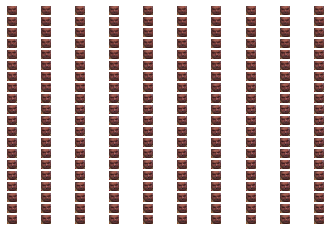

In [19]:
# demonstrate face detection on multiple faces at same time
# in this we are not drawing rectangle around faces, we are extracting the
# pixels of faces so that later these values can be used as input to our facenet model
# we can scale our images using required_size parameter
import cv2
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot

# function to extract a single face from a given photograph
# This functions returns the array of pixel values of face





def extract_face(filename, required_size=(256, 256)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# detect faces in the image using facebox pretrained model
	# Keep thresold low to avoid errors in coming 
	results = face_detector(pixels,score_threshold=0.3)
	# extract the bounding box from the first face 
  # If multiple face is present this function can be modified
	y1, x1, y2, x2 = results[0][0]
	# changing values into integers because there are some float values as well 
	x1, y1,x2,y2 = int(x1), int(y1),int(x2), int(y2)
	
	# extract the face using list slicing 
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# specify image folder to plot
#folder = '/content/gdrive/MyDrive/Colab_Notebooks/face_recog/data2/data2/train/shahid/'
folder = '/content/gdrive/MyDrive/DG_ISPR_Snaps/'
i = 1
# enumerate all the files and show the image(only faces)
for filename in listdir(folder):
  # path
  path = folder + filename
  # get face
  face = extract_face(path)
  print(i, face.shape)
  cv2.imwrite(f"/content/gdrive/MyDrive/cropped_images/frame{i}.jpg", face[:,:,::-1])
  pyplot.subplot(20, 10, i)
  pyplot.axis('off')
  pyplot.imshow(face)
  i += 1



pyplot.show()

